In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# 1. Data loading and pre-processing
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# 2. Application of t-SNE to get a reduced (2D) representation
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_train)

In [ ]:
# 3. Definition of the decoding net (attempt to reconstruct the original data)
input_tsne = Input(shape=(2,))
x = Dense(128, activation='relu')(input_tsne)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output_img = Dense(28*28, activation='sigmoid')(x)

decoder = Model(inputs=input_tsne, outputs=output_img)
decoder.compile(optimizer='adam', loss='mse')

In [ ]:
# 4. Network training
decoder.fit(x_train_tsne, x_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0682 - val_loss: 0.0481
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0463 - val_loss: 0.0407
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0405 - val_loss: 0.0380
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0383 - val_loss: 0.0370
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0371 - val_loss: 0.0364
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0365 - val_loss: 0.0354
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0357 - val_loss: 0.0351
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0353 - val_loss: 0.0349
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0349 - val_loss: 0.0342
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0348 - val_loss: 0.0351
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0344 - val_loss: 0.0337
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


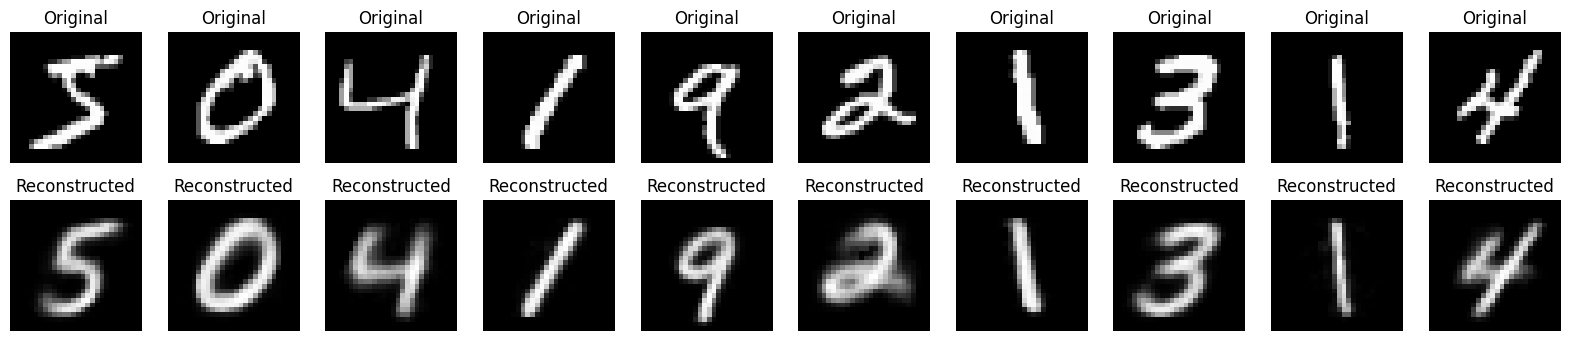

In [ ]:
# 5. Visualization of the reconstructed images
n = 10  # Number of original images to visualize
decoded_imgs = decoder.predict(x_train_tsne[:n])

# Show the original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()